In [1]:
%matplotlib inline

import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
pd.options.mode.chained_assignment = None #default = 'warn'

sns.set(style="whitegrid")

# You may load the dataset from URL (instead of the local file) if you wish
auto_mpg_data = "https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/auto-mpg.data.txt"
auto_mpg_names = "https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/auto-mpg.names.txt"

In [2]:
columns = [
    'mpg', 
    'cylinders', 
    'displacement', 
    'horsepower',
    'weight', 
    'acceleration', 
    'model year',
    'origin', 
    'car name'
]

data = pd.read_csv(auto_mpg_data, sep='\s+', header=None, names=columns)

data_no_missing = data[data['horsepower'] != '?']
data_no_missing['horsepower'] = data_no_missing['horsepower'].astype('float64')
data = data.replace('?', '93.5')
data['horsepower'] = data['horsepower'].astype('float64')

In [3]:
def histogram_trio(data, variable_name, zoom=1.0):
    h = freeman_diaconis(data[variable_name])
    mn = int(data[variable_name].min())
    mx = int(data[variable_name].max())
    bins = [i for i in range( mn, mx, h)]
    print(f"Freeman Diaconis for {variable_name}: {len(bins)} bins")

    observations = len(data)
    empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

    fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

    fewer_bins = int(len(bins) * .50)
    more_bins = int(len(bins) * 2)

    n, bins, patches = ax[1].hist(data[variable_name], color="DimGray", bins=bins, weights=empirical_weights) # <---
    ax[1].set_xlabel(variable_name)
    ax[1].set_ylabel("Relative Frequency")
    ax[1].set_title(f"Relative Frequency Histogram of {variable_name}")
    ax[1].set_ylim((0, zoom))
    
    n, bins, patches = ax[0].hist(data[variable_name], color="DimGray", bins=fewer_bins, weights=empirical_weights)
    ax[0].set_xlabel(variable_name)
    ax[0].set_ylabel("Relative Frequency")
    ax[0].set_title(f"Relative Frequency Histogram of {variable_name} (Fewer Bins)")
    
    n, bins, patches = ax[2].hist(data[variable_name], color="DimGray", bins=more_bins, weights=empirical_weights)
    ax[2].set_xlabel(variable_name)
    ax[2].set_ylabel("Relative Frequency")
    ax[2].set_title(f"Relative Frequency Histogram of {variable_name} (More Bins)")

    plt.show()
    plt.close()

In [4]:
def histogram_w_whiskers(data, variable_name, zoom=None):
    h = freeman_diaconis(data[variable_name])
    mn = int(data[variable_name].min())
    mx = int(data[variable_name].max())
    bins = [i for i in range( mn, mx, h)]
    print(f"Freeman Diaconis for {variable_name}: {len(bins)} bins")

    observations = len(data)
    empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
        
    # start the plot: 2 rows, because we want the boxplot on the first row
    # and the hist on the second
    fig, ax = plt.subplots(
        2, figsize=(7, 5), sharex=True,
        gridspec_kw={"height_ratios": (.7, .3)}  # the boxplot gets 30% of the vertical space
    )

    # the histogram
    ax[0].hist(data[variable_name],bins=bins, color="dimgray", weights=empirical_weights)
    ax[0].set_title(f"{variable_name} distribution - Freeman Diaconis")
    ax[0].set_ylabel("Relative Frequency")
    if zoom:
        ax[0].set_ylim((0, zoom))
    # the box plot
    ax[1].boxplot(data[variable_name], vert=False)
    # removing borders
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].set_xlabel(variable_name)

    # and we are good to go
    plt.show()
    plt.close()
    return h

In [24]:
def freeman_diaconis(data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    if h < 1:
        return 1
    return int( h)

$Weight$

Now we look at car weight. This is also a continuous, numeric variable. Typical car weight ranges are between 2,600 - 3,500 pounds - [how much does a car weigh?](https://www.insurancenavy.com/average-car-weight/). We expect larger cars to have bigger engines, and perhaps more cylinders. Since we already know the most common type of engine here is a 4-cylinder by a wide margin, I'd expect the weight distribution here to be closer to 2,600 than it is to 3,500. Let's see the summary statistics.

In [6]:
data['weight'].describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

We have a mean of 2970 and a median of about 2803, slightly smaller. The 1st quartile is 2223, close to the median, while the third quartile is slightly further away at 3608. The max is 5140, while the min is only 1613. For our histogram, we expect to see a a slight right skewed histogram, with possible extreme values above the 3rd quartile.

Freeman Diaconis for weight: 10 bins


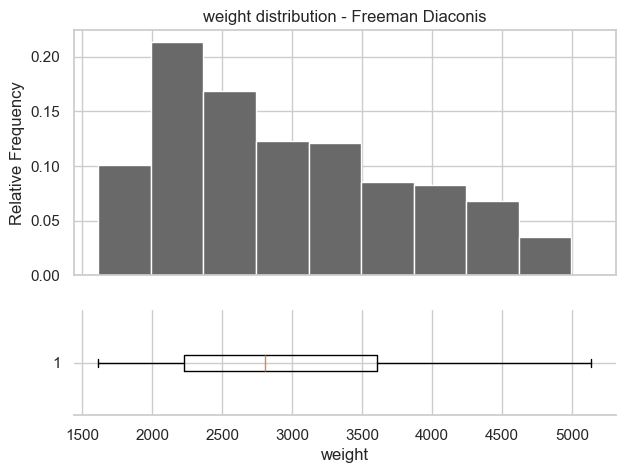

376

In [7]:
histogram_w_whiskers(data, 'weight')

Actually no extreme values, since the interquartile range of roughly 1,400 (and thus the 'whiskers') are fairly large to compensate. The most frequent weight is around 2,200, close to the 1st quartile, and the frequency steadily decreases as weight goes up from there. About 10% of the car weights are between the min (1613) and 2000. That seems interesting, since it doesn't fall into the same pattern.

Let's try changing bin sizes, maybe more bins can help clarify the low range of weights.

Freeman Diaconis for weight: 10 bins


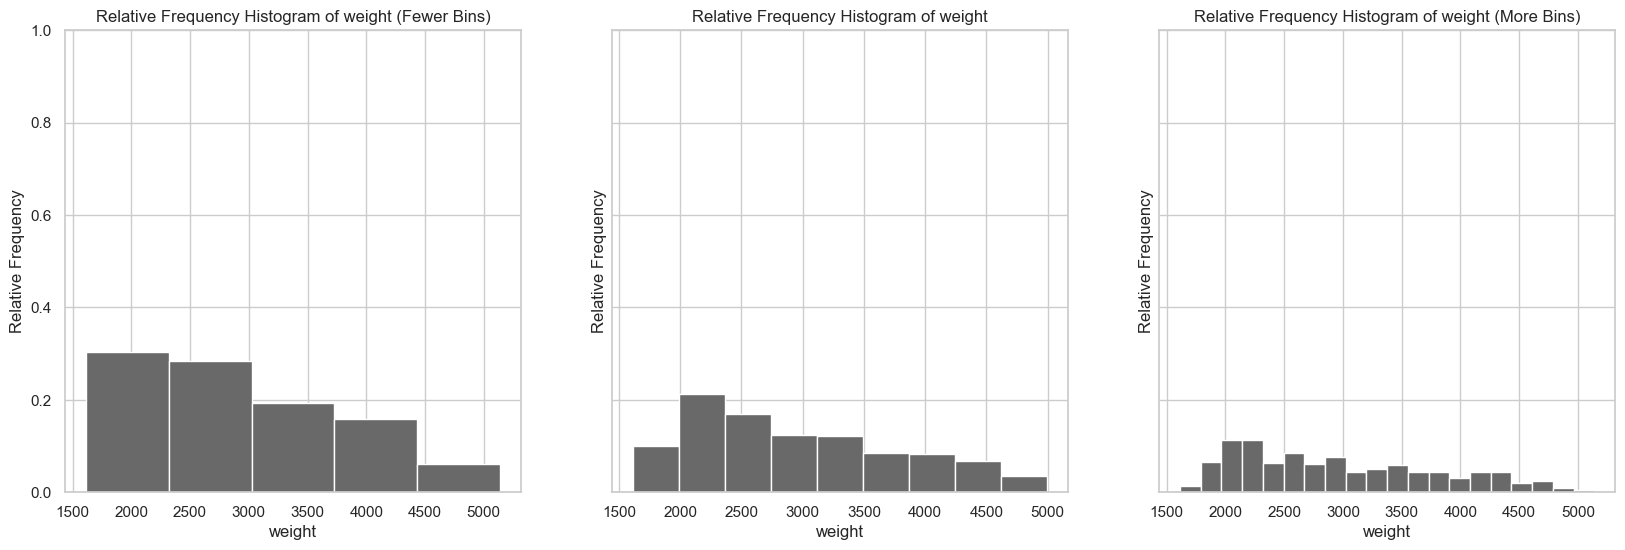

In [8]:
histogram_trio(data, 'weight')

Nothing too suspicious here, we see pretty much the same histogram as the initial plot. With less bins, we see the decreasing frquency pattern to include the lower weights, which looks nice but doesn't tell us much else unfortunately.

1. Cars that weigh more likely have bigger engines, use more $horsepower$, and thus could lead to lower $mpg$.

2. Again we expect auto makers to have certain quality control procedures, and could account for the decreasing proportion for larger weights, which might be for specialty vehicles.

3. It would be interesting to look at how some of the larger cars presented here compare to other types of vehicles such as schoolbuses and hospital vans.

### $Acceleration$

Acceleration is the rate at which a car can increase its speed (or rate the speed decreases if we talk about deceleration). Acceleration is a standard physics equation given by:

$Acceleration = \frac{\Delta v}{\Delta t}$, where

$\Delta v = Change \ in \ velocity$ <br>
$\Delta t = Change \ in \ time$

I couldn't find a good source on typical values for car acceleration, but found that this measurement, at least in the US, is typically measured by how fast a car can accelerate from 0-60 miles per hour. According to [Wikipedia](https://en.wikipedia.org/wiki/List_of_fastest_production_cars_by_acceleration), some of the fastest cars can have an acceleration time of only about 2 seconds, while more typical values might be closer to 10 seconds. 

This is also a continuous numeric variable, so let's view the summary statistics. I'd expect the most frequent values to be close to 10, give or take a few seconds.

In [9]:
data['acceleration'].describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

We have a mean of 15.6 and standard deviation of 2.76. The min is 8 while the max is 24, not too large of a range. Our 1st quartile, median, and 3rd quartile are fairly tight at 13.8, 15.5, and 17.2, respectively. For our histogram, we expect a pretty symmetric plot, as our mean and median are nearly identical.

Freeman Diaconis for acceleration: 16 bins


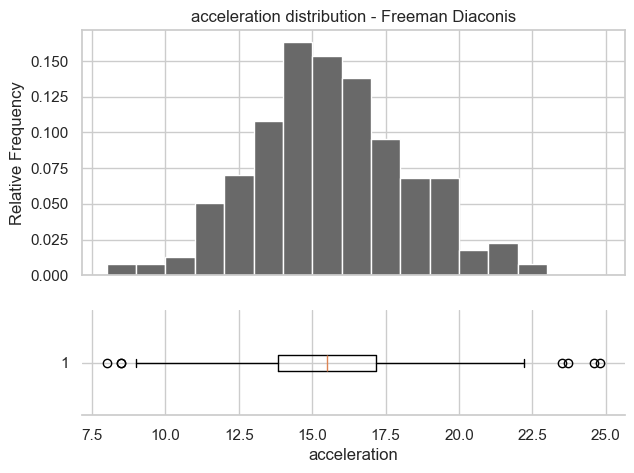

1

In [26]:
histogram_w_whiskers(data, 'acceleration')

We see a very symmetric histogram. There are a few extreme values on either side of the boxplot. Because we have such a small interquartile range, this is not unfounded. The values below about 11.0 and above 20.0 do show a dip on either side. Let's see if we can see any other interesting patterns by changing bin size.

Freeman Diaconis for acceleration: 16 bins


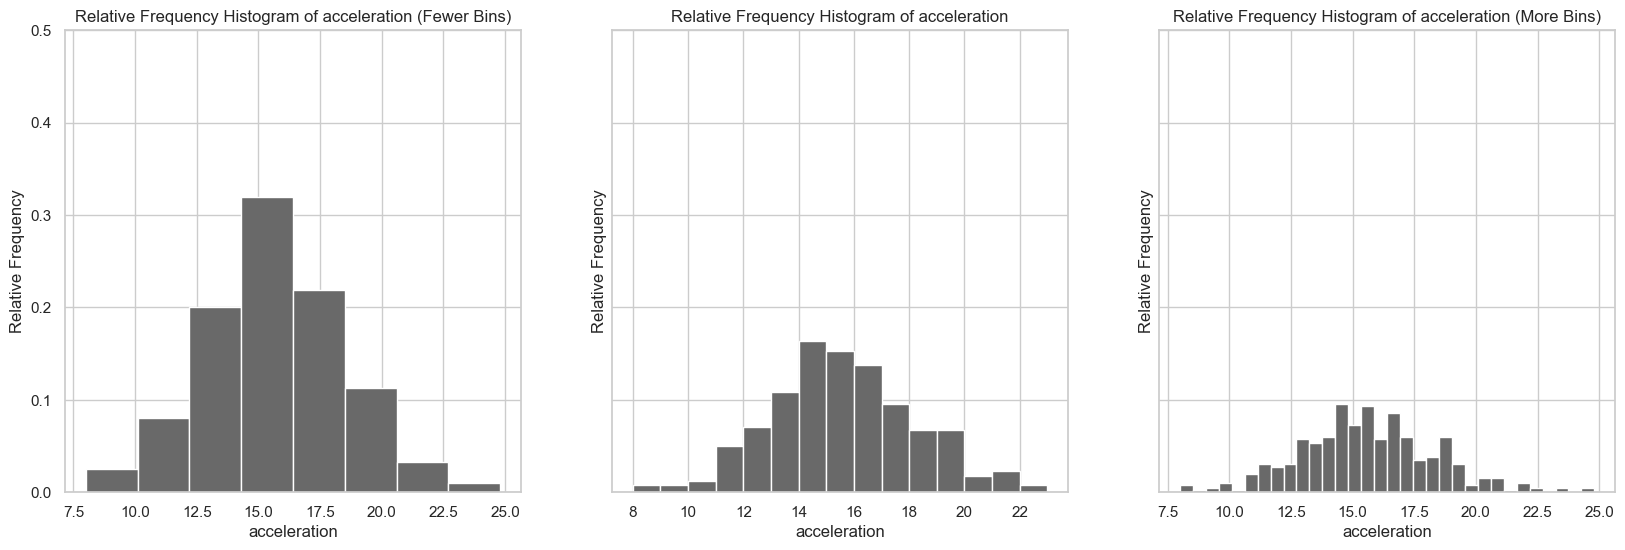

In [28]:
histogram_trio(data, 'acceleration', zoom=0.5)

Nothing too unusual here, this is just a simple, fairly symmetric histogram. 

1. Acceleration is not just dependent on the physics formula above, but we could consider $horsepower$ and maybe tire treads/friction as to how fast a car might accelerate - there are other unknown knowns and unknown unknowns that might play a role.